# CM3060 Natural Language Processing midterm coursework 
## Done by: Zou JiaJun

# I: Introduction
## 1: Introduction to the domain-specific area 

SMS spamming, also known as text message spamming, is the act of sending out a lot of inappropriate text messages that contain ads, phishing attempts, scams, and other unwanted content[1]. With the rise of mobile devices and the popularity of SMS (Short Message Service), SMS spamming has become more common as mobile phones have become more important in our daily lives. 

In recent years, this problem has grown more widespread [2], providing a substantial difficulty for people on an individual level as well as for businesses that are involved in the telecommunications industry. The RoboKiller Report estimates that there will be 58% more spam texts yearly and that spam SMS will contribute to billions of dollars losses in spam text in 2021 [3]. 

SMS spam is challenging to stop at the network level. Even companies like Verizon say they've stopped billion of spam calls, but they don't say how many texts they've stopped[4]. Because spammers are so skilled at sending spam SMS, it doesn't matter how many spam messages are reported or deleted; they can still simply construct a "SIM farm" to send even more. They will make it seem that many of the spam messages are coming from legitimate businesses, which will boost both their reputation and their chances of being successful. A while back, victims got spam SMS from fraudsters posing as the bank and stating there were issues with their accounts or credit cards. Nearly 500 people got scammed by the mail, which featured a link to a fake OCBC website [5].

Text classification is the process of organising text documents into predetermined categories or labels based on their content. In the case of SMS spamm, text classification methods can be used to tell the difference between real messages and spam messages. This lets mobile phone users clear out annoying texts and improves their overall messaging experience.

SMS spaming has been the subject of many works in the past. Researchers and people in the business have looked into different machine learning methods and natural language processing techniques to make spam detection systems that are reliable and accurate [6]. These systems look at the content and structure of SMS messages and pull out important features and trends that help them tell the difference between spam and real texts. This project hopes to make more progress in the area of SMS spam identification by adding to the study that has already been done.

## 2: Objectives of the project

The primary objective of this project is to develop a highly accurate and efficient SMS spam classification system. By using state-of-the-art machine learning methods, natural language processing techniques, and feature engineering, the goal is to make a solution that can correctly spot junk messages and screen them out in real time. 

In terms of business, I believe that telecommunications companies may enhance their services by using strong spam detection systems. Customers will be better satisfied, and network congestion caused by spam SMS will be reduced.

Personally, I feel that this attempt is crucial since it might help in the resolution of some unpleasant instances caused by SMS spamming. One of my family members was previously conned, and although the amount was not huge, I feel it served as a wake-up call to me that spam SMS might have far-reaching effects if we continue this kind of behaviour. I understand that many telecommunications providers have implemented technology that filters out the message, but I feel it is better for me to work alongside so that people within my organisation are not defrauded by SMS spamming again.

To summarise, this project will develop a text classification system to target the domain-specific problem of SMS spamming. This initiative seeks to lessen the harmful impacts of SMS spamming on individuals and telecom businesses by providing an accurate and effective solution.

## 3: Dataset

To solve the problem of SMS spam detection, a sufficient dataset may be obtained from Kaggle, a famous site for data science and machine learning contests. The "SMS Spam Collection" dataset, which can be accessed at the following Kaggle link:
https://www.kaggle.com/datasets/thedevastator/sms-spam-collection-a-more-diverse-dataset. 

In this scenario, I'll be using a Kaggle dataset. The "SMS Spam Collection" dataset is an assortment of SMS messages, both spam and legal, collected for study. The dataset is made up of a total of 5,574 SMS messages. These messages came from many different places, including real messages from people and junk messages reported by users or taken from spam files.

The dataset has two columns:

- "Label": Each SMS message is assigned a label or class in this column that designates whether it is spam or not (ham). The labels are binary, with "spam" indicating spam messages and "ham" indicating legal messages.

- "sms": The text of each SMS message is included in this column. It is made up of the message's original text, which includes all of the words, punctuation, and other characters.

The dataset contains a typical sample of SMS messages, making it possible to build and evaluate SMS spam categorization algorithms. It includes a wide variety of spam and valid texts, representing the changes and characteristics of real-world SMS spamming events. Additionally, it includes 5,574 SMS texts in total, making it a sizable dataset for developing and testing machine learning models. 

The dataset was shared with the data science community and uploaded on Kaggle by researchers in order to improve research and development in the field of SMS spam detection. This dataset origin from Huggingface Hub, which can be found at https://huggingface.co/datasets/sms_spam. This dataset's licence is CCO: Public Domain, which implies that there are no copyright restrictions and that anybody may edit the data without seeking permission[7]. 

## 4: Evaluation methodology

I will use several techniques to evaluate the performance and efficacy of this SMS spam detection system. The following techniques and methods are used:

<b>Performance Metrics:</b> It help assess the SMS spam detection model. Metrics include:

- <b>Accuracy:</b> The percentage of successfully categorised spam and valid messages. It is use to find out the ratio of successfully classified messages to total messages determines it. The higher the accuracy, the better the model is.

- <b>Precision:</b> Percentage of spam texts accurately recognised. It is use to find out the ratio of true positive (spam) messages to the total of true and false positive sms. The higher the precision, the better the model is.

- <b>Recall:</b> The percentage of dataset spam messages accurately identified. It is use to find out te ratio of true positive (spam) messages to the total of true positive and false negative messages. The higher the recall scoere, the better the model is.

- <b>F1-Score:</b> A single measure that balances accuracy and recall evaluates the model's performance. The higher the F1 score, the higher the model is.

- <b>The confusion matrix:</b> It will be able to identify the model's false negatives and false positives. As a result, we may use it to assess if a model is appropriate for classifying sms spam. As the goal is to have an excellent model with little or no false positive or negative, we may also use it to determine if the false negative rate is large or not.

- <b>AUC (Area Under the Curve) score:</b> The AUC score summarises the model's performance across all classification levels, making it helpful for comparing models or modifying the limit for problem-specific decision-making. 

<b>Train-Test Split:</b> The data set can be split into a training set and a testing set. The SMS spam detection model is trained using the training set, and its performance is evaluated using the testing set. I'll divide the data into an 8:2 ratio, with 80% of the data used for training and 20% for testing.

To give a thorough evaluation of the SMS spam detection model's performance, various evaluation techniques were developed. While precision and recall concentrate on certain elements (such as spam identification and preventing false positives or false negatives), accuracy offers a broad assessment of how well the model is working. The F1-score balances accuracy and recall to measure the model's overall efficacy. Train-test split makes sure the model is assessed on untried data. 

# II: Implementation 
## 5: Preprocessing

In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

# PREPROCESSING
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score

# MODELS
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from xgboost import XGBClassifier

In [2]:
# load the dataset from csv
data = pd.read_csv('sms_spam.csv')
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### Explore the data

In [3]:
# check the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [4]:
# Check whether if the data got null value
data.isnull().sum()

sms      0
label    0
dtype: int64

In [5]:
data.groupby('label').describe()

sms                                                               
      count unique                                                top freq
label                                                                     
0      4827   4518                           Sorry, I'll call later\n   30
1       747    653  Please call our customer service representativ...    4

In [6]:
# See the overview of the data
data.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
# Retrieve the values from sms
df = pd.DataFrame({'words': data['sms'], 
                   'label': data['label']})
text_column = df['words']
df['words']

0       Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...\n
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570               Will ü b going to esplanade fr home?\n
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                         Rofl. Its true to its name\n
Name: words, Length: 5574, dtype: object

### Clean the text in the message

In [8]:
# 1. lowercasing the words
# 2. removing punctuation
# 3. keeping only alphabetic characters and spaces 
# 4. stripping leading and trailing space
df["words"] = df["words"].str.lower() \
    .str.replace('[,\.!?:()"]', '') \
    .str.replace('[^a-zA-Z"]', ' ') \
    .str.strip()
df['words']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in   a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5569    this is the  nd time we have tried   contact u...
5570                  will   b going to esplanade fr home
5571    pity   was in mood for that soany other sugges...
5572    the guy did some bitching but i acted like i d...
5573                            rofl its true to its name
Name: words, Length: 5574, dtype: object

In [9]:
# Load stopwords
stop_words = set(stopwords.words("english"))
df["words"] = df["words"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df[:10]

,words,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aids patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile months u r entitled update latest colou...,1


### Explore the common words using wordcloud

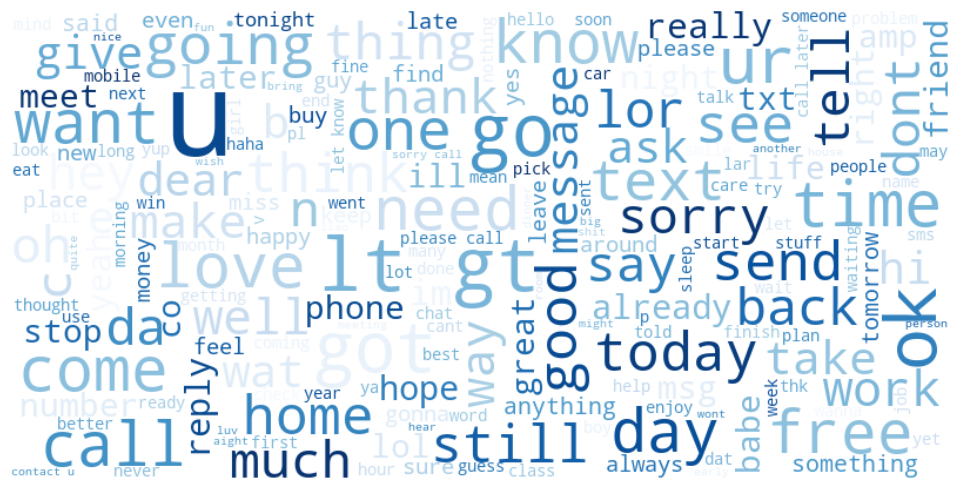

In [10]:
# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues',
               max_words=200, max_font_size=100, random_state=101).generate(' '.join(df['words']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

### lemmatisate the word 
- Allow user to read the context of the message faster and determine the message whether is it a spam message
- The purpose of selecting lemmatization rather than stemming is to maintain the content of the message in a form that is as similar as possible to the original message that was sent.

In [11]:
lemmatizer = WordNetLemmatizer()
df["words"] = df["words"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

,words,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think go usf life around though,0


## 6: Baseline performance
### Train Test split

In [12]:
# Make X and y the subject
X = df['words']
y = df['label']

# Train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle=True, 
                                                    random_state=42)
# printing the shape of the splits
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4459,) (4459,) (1115,) (1115,)


### Vectorization

In [13]:
# Create an instance of CountVectorizer
vect = CountVectorizer()

# Fit and transform the training data
X_train_dtm = vect.fit_transform(X_train)
print("X_train_dtm:")
print(X_train_dtm.toarray())  # Convert sparse matrix to array for better visualization
print()

# Transform the testing data using the fitted vocabulary
X_test_dtm = vect.transform(X_test)
print("X_test_dtm:")
print(X_test_dtm.toarray())  # Convert sparse matrix to array for better visualization

X_train_dtm:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

X_test_dtm:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# Retrieve the first 10 feature names from the vectorizer 
vect.get_feature_names_out()[:10] 

array(['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere',
       'ab', 'abbey', 'abdomen', 'abeg'], dtype=object)

## MultinomialNB
Multinomial Naive Bayes (MultinomialNB), one of the most excellent classification of texts techniques, is widely used. It works well for discrete text properties like word counts and phrase frequencies [8].

In [15]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# Train the model 
nb.fit(X_train_dtm, y_train)

# Make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

### Identify the false positive and false negatives in the data

In [16]:
# print message text for the false positives (true incorrectly classified as spam)
false_pos = X_test[(y_pred_class==1) & (y_test==0)]

# Create a DataFrame containing false positive with their true labels and message text
false_pos_df = pd.DataFrame({
    'Label': y_test.loc[false_pos.index],  # True labels of the false negatives
    'Message': false_pos  # Message text of the false negatives
})

false_pos_df

,Label,Message
2251,0,getting threat sale executive shifad raised co...
3142,0,customer place call
4600,0,laid airtel line rest
4419,0,get free call
1618,0,u download fring app
4702,0,liked new mobile
5046,0,sent jd customer service cum account executive...
1421,0,currently scotland
387,0,customer place call
670,0,u receive msg


In [17]:
# Select instances where the predicted class is 0 (negative) and the actual class is 1 (positive)
false_neg = X_test[(y_pred_class == 0) & (y_test == 1)]

# Create a DataFrame containing false negatives with their true labels and message text
false_neg_df = pd.DataFrame({
    'Label': y_test.loc[false_neg.index],  # True labels of the false negatives
    'Message': false_neg  # Message text of the false negatives
})

false_neg_df

,Label,Message
3742,1,tf p
1893,1,call listen extreme dirty live chat going offi...
856,1,talk sexy make new friend fall love world disc...
2663,1,hello darling today would love chat dont tell ...
4821,1,check choose babe video smsshsexnetun fgkslpop...
3885,1,link picture sent also use http alto couk wave...
751,1,realize year thousand old lady running around ...
3864,1,oh god found number glad text back xafter msg ...
4213,1,missed call alert number called left message
2699,1,lost help


### Visulaise the MultinomialNB using confusion matrix

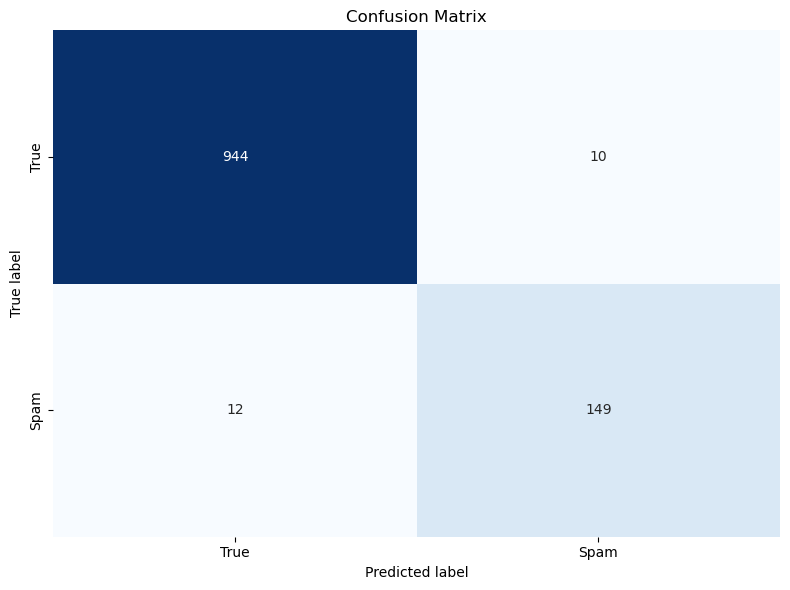

In [18]:
# Calculate the confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['True', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'Spam'])
plt.tight_layout()
plt.show()

### Print all the performance metrics

In [19]:
#Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("The score for nb accuracy: %.3f" % accuracy)

# Calculate recall
recall = metrics.recall_score(y_test, y_pred_class)
print("The score for nb recall: %.3f" % recall)

# Calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_class)
print("The score for nb F1 Score: %.3f" % f1)

# Calculate precision
precision = metrics.precision_score(y_test, y_pred_class)
print("The score for nb precision: %.3f" % precision)

# Calculate AUC score
auc = metrics.roc_auc_score(y_test, y_pred_class)
print("The score for nb AUC: %.3f" % auc)

# print the confusion matrix 
print("The confusion matrix for nb: ", cf_matrix)

The score for nb accuracy: 0.980
The score for nb recall: 0.925
The score for nb F1 Score: 0.931
The score for nb precision: 0.937
The score for nb AUC: 0.957
The confusion matrix for nb:  [[944  10]
 [ 12 149]]


## 7: Classification approach 
### 7.1 KNN classifier

In [20]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Fit the classifier on the training data
knn.fit(X_train_dtm, y_train)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test_dtm)

# Print the true labels and predicted labels
print("True labels:", y_test)
print("Predicted labels (KNN):", y_pred_knn)

True labels: 3690    0
3527    0
724     0
3370    0
468     0
       ..
2942    0
4864    1
3227    0
3796    0
2879    1
Name: label, Length: 1115, dtype: int64
Predicted labels (KNN): [0 0 0 ... 0 0 0]


### 7.2 XGB classifier

In [21]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the classifier on the training data
xgb.fit(X_train_dtm, y_train)

# Predict the labels for the test data
y_pred_xgb = xgb.predict(X_test_dtm)

# Print the true labels and predicted labels
print("True labels:", y_test)
print("Predicted labels (XGBoost):", y_pred_xgb)

True labels: 3690    0
3527    0
724     0
3370    0
468     0
       ..
2942    0
4864    1
3227    0
3796    0
2879    1
Name: label, Length: 1115, dtype: int64
Predicted labels (XGBoost): [0 0 0 ... 0 0 1]


# III: Conclusions
## 9: Evaluation

### 9.1 Visualise KNN Classifer

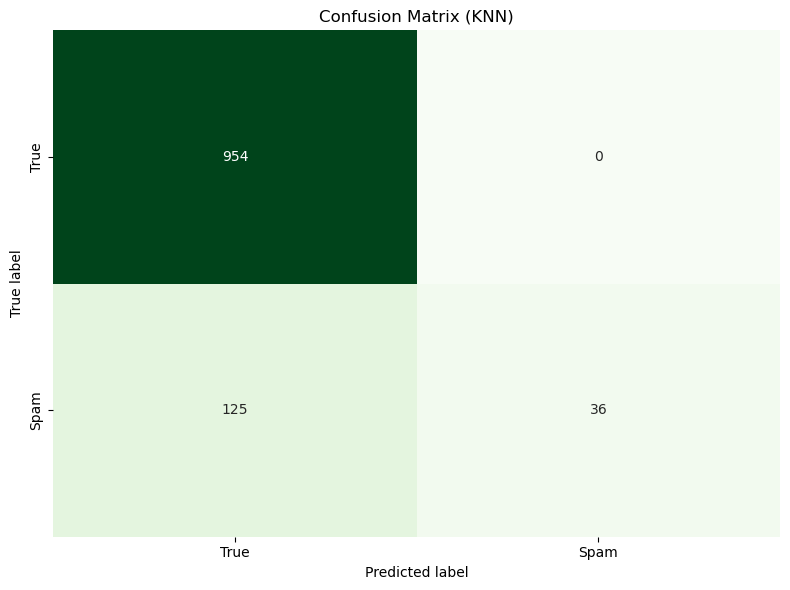

In [22]:
# Calculate the confusion matrix
cf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_knn, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (KNN)')
plt.xticks(ticks=[0.5, 1.5], labels=['True', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'Spam'])
plt.tight_layout()
plt.show()

### Print all the performance for KNN

In [23]:
# Calculate accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("The accuracy score for KNN: ", accuracy_knn)

# Calculate recall
recall_knn = metrics.recall_score(y_test, y_pred_knn)
print("The recakk score for KNN: ", recall_knn)

# Calculate F1 score
f1_knn = metrics.f1_score(y_test, y_pred_knn)
print("The f1 score for KNN: ", f1_knn)

# Calculate precision
precision_knn = metrics.precision_score(y_test, y_pred_knn)
print("The precision score for KNN: ", precision_knn)

# Calculate AUC score
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn)
print("The auc score for KNN: ", auc_knn)

# Calculate confusion matrix
cf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print("The matrix for KNN:", cf_matrix_knn)

The accuracy score for KNN:  0.8878923766816144
The recakk score for KNN:  0.2236024844720497
The f1 score for KNN:  0.3654822335025381
The precision score for KNN:  1.0
The auc score for KNN:  0.6118012422360248
The matrix for KNN: [[954   0]
 [125  36]]


### 9.2: Visualise XGB Classifer

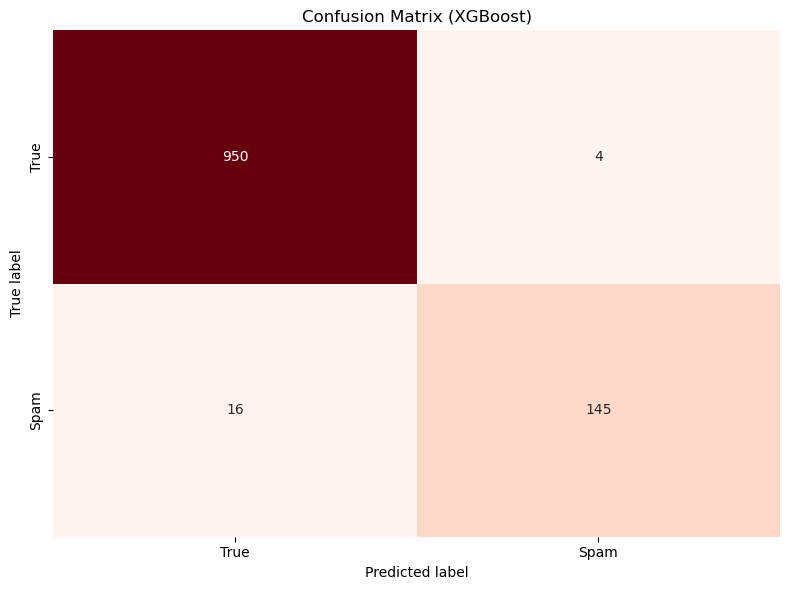

In [24]:
# Calculate the confusion matrix
cf_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_xgb, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (XGBoost)')
plt.xticks(ticks=[0.5, 1.5], labels=['True', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'Spam'])
plt.tight_layout()
plt.show()

### Print all the performace metrics for XGBoost

In [25]:
# Calculate accuracy
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
print("The accuracy score for XGBoost: ", accuracy_xgb)

# Calculate recall
recall_xgb = metrics.recall_score(y_test, y_pred_xgb)
print("The recall score for XGBoost: ", recall_xgb)

# Calculate F1 score
f1_xgb = metrics.f1_score(y_test, y_pred_xgb)
print("The f1 score for XGBoost: ", f1_xgb)

# Calculate precision
precision_xgb = metrics.precision_score(y_test, y_pred_xgb)
print("The precision score for XGBoost: ", precision_xgb)

# Calculate AUC score
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
print("The auc score for XGBoost: ", auc_xgb)

# Calculate confusion matrix
cf_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
print("The confusion matrix for XGBoost: ", cf_matrix_xgb)

The accuracy score for XGBoost:  0.9820627802690582
The recall score for XGBoost:  0.9006211180124224
The f1 score for XGBoost:  0.935483870967742
The precision score for XGBoost:  0.9731543624161074
The auc score for XGBoost:  0.948214122947511
The confusion matrix for XGBoost:  [[950   4]
 [ 16 145]]


### 9.3: Overview of three classifiers scores

In [26]:
# Function to print scores and confusion matrix
def print_scores(classifier, accuracy, recall, f1, precision, auc, cf_matrix):
    print(classifier + " Classifier")
    print("Accuracy: %.3f" % accuracy)
    print("Recall: %.3f" % recall)
    print("F1 Score: %.3f" % f1)
    print("Precision: %.3f" % precision)
    print("AUC: %.3f" % auc)
    print("Confusion Matrix:")
    print(cf_matrix)
    print()

# Print scores and confusion matrix for Naive Bayes
print_scores("Naive Bayes", accuracy, recall, f1, precision, auc, cf_matrix)

# Print scores and confusion matrix for KNN
print_scores("KNN", accuracy_knn, recall_knn, f1_knn, precision_knn, auc_knn, cf_matrix_knn)

# Print scores and confusion matrix for XGBoost
print_scores("XGBoost", accuracy_xgb, recall_xgb, f1_xgb, precision_xgb, auc_xgb, cf_matrix_xgb)

Naive Bayes Classifier
Accuracy: 0.980
Recall: 0.925
F1 Score: 0.931
Precision: 0.937
AUC: 0.957
Confusion Matrix:
[[944  10]
 [ 12 149]]

KNN Classifier
Accuracy: 0.888
Recall: 0.224
F1 Score: 0.365
Precision: 1.000
AUC: 0.612
Confusion Matrix:
[[954   0]
 [125  36]]

XGBoost Classifier
Accuracy: 0.982
Recall: 0.901
F1 Score: 0.935
Precision: 0.973
AUC: 0.948
Confusion Matrix:
[[950   4]
 [ 16 145]]



### Plot the graph of three classifiers

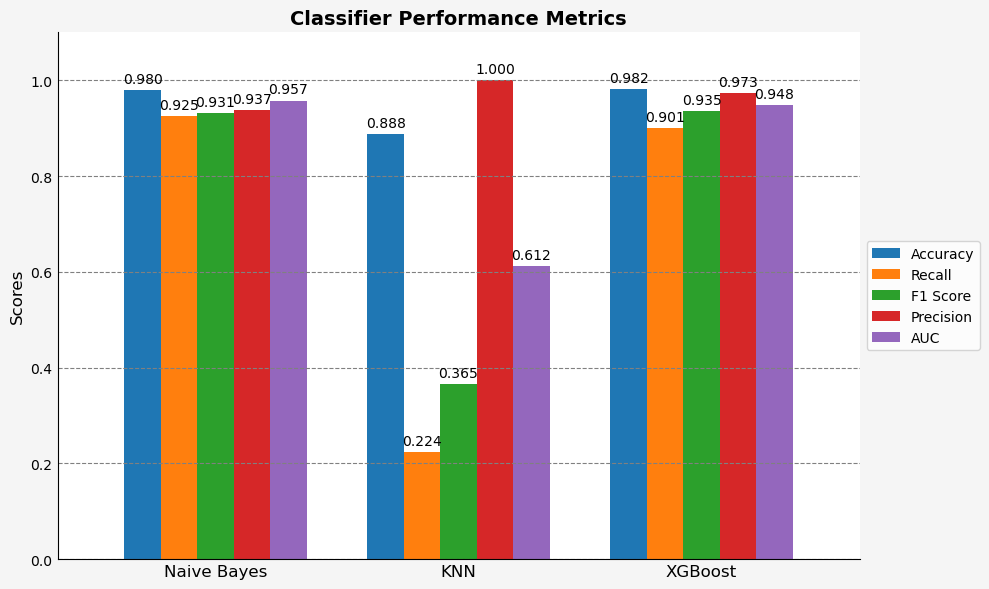

In [27]:
# Define the scores for each metric and classifier
accuracy_scores = [accuracy, accuracy_knn, accuracy_xgb]
recall_scores = [recall, recall_knn, recall_xgb]
f1_scores = [f1, f1_knn, f1_xgb]
precision_scores = [precision, precision_knn, precision_xgb]
auc_scores = [auc, auc_knn, auc_xgb]

# Define the classifiers
classifiers = ["Naive Bayes", "KNN", "XGBoost"]

# Set the position of each bar on the x-axis
x_pos = np.arange(len(classifiers))

# Set the width of each bar
width = 0.15

# Set the colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the grouped bar plot
rects = []
metrics = ['Accuracy', 'Recall', 'F1 Score', 'Precision', 'AUC']
for i, scores in enumerate([accuracy_scores, recall_scores, f1_scores, precision_scores, auc_scores]):
    rect = ax.bar(x_pos + (i - 2) * width, scores, width, label=metrics[i], color=colors[i])
    rects.append(rect)

# Set the x-axis tick labels and font size
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers, fontsize=12)

# Set the y-axis label and font size
ax.set_ylabel('Scores', fontsize=12)

# Set the plot title and font size
ax.set_title('Classifier Performance Metrics', fontsize=14, fontweight='bold')

# Add values to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

for rect in rects:
    autolabel(rect)

# Move the legend outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust the plot margins
plt.margins(0.1, 0.1)

# Add grid lines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Set the axis tick parameters
ax.tick_params(axis='both', which='both', length=0)

# Set the figure background color
fig.patch.set_facecolor('#f5f5f5')

# Set the plot background color
ax.set_facecolor('#ffffff')

# Display the plot
plt.tight_layout()
plt.show()


### 9.4: Evaulation on classifers

Accuracy: The accuracy ratings for the Naive Bayes classifier, KNN classifier, and XGBoost classifier in this assessment were 0.980, 0.888, and 0.982, respectively. XGBoost has the highest accuracy score.

Recall: Lower false negative rates are indicated by a greater recall. Recall for the Naive Bayes classifier was 0.925, for the KNN classifier it was 0.224, and for the XGBoost classifier it was 0.901. Naive Bayes has the highest recall score.

F1 Score: The F1 scores for the Naive Bayes classifier, the KNN classifier, and the XGBoost classifier were 0.931, 0.365, and 0.935 respectively. XGBoost has the highest F1 score.

Precision: Lower false positive rates are indicated by higher precision. The Naive Bayes classifier, the KNN classifier, and the XGBoost classifier all obtained precision values of 0.937, 1.000, and 0.973, respectively. KNN has the highest precision score.

AUC (Area Under the Curve): A higher AUC suggests greater classifier performance. The Naive Bayes classifier, KNN classifier, and XGBoost classifier each obtained an AUC of 0.957, 0.612, and 0.948, respectively. Naive Bayes has the highest AUC score.

The Naive Bay classifier, among the three, performs better, as the resut of the metrics are more evenly or higher than those of the other two classifiers.

## 10: Summary and Conclusions

The effort to categorise SMS spam is very important to the problem of unwanted and maybe dangerous text messages. If SMS messages could be accurately identified as spam or non-spam, the impact of spam on individuals and companies may be significantly minimised. The analysis, especially for the Naive Bayes classification, gives more positive results for accuracy, precision, recall, and F1 score as compare to the other two models. Naive Bayesis is a probabilistic classifier that works well with text data. In contrast to KNN, which uses the distance between data points [9], XGBoost is an ensemble model that mixes many decision trees [10]. These models' complexity might result in overfitting, particularly if the dataset is small. For text classification problems like SMS spamming, the Naive Bayes model makes a reasonable assumption that features are independent of one another. Therefore, in my opinion, Naive Bayes outperforms the other two algorithms.

Email spam detection may be the transferred domains. As we know, spam emails may be harmful. The SMS spam algorithm is capable of analysing incoming email content and patterns to predict spam. Text categorization, feature extraction, and other methods make email spam detection more straightforward. It can send them to the spam folder and block them all at once. This can aid users in maintaining a clean inbox and reduce the likelihood of phishing attacks and other email-based schemes.

Following that, it can be applicable to financial transactions. The SMS spam algorithm may be used to assess transaction data and user activity to discover trends associated with illegal activities. It may flag or send a warning to the suspicious transaction in real time using machine learning techniques, anomaly detection, and certain RISJ scoring models. This will enable financial institutions to take fast action to avert undesired circumstances and secure their customers' assets.

As every yin has a yang, there are several factors to consider. First off, the frequency of false positives and false negatives is a prevalent issue with spam detection systems. Since no system is perfect, there will always be occasions when it is misclassified. The user's experience will be impacted, and there's a small risk that they'll get spam SMS or emails as a result.
Additionally, spammers can adapt their techniques to bypass spam filters. In order to guarantee that the algorithm remains successful, regular updates are also required.

## References 

1. Makoza, Frank Makoza. “What Is SMS Spamming | IGI Global.” Www.igi-Global.com, 2019, www.igi-global.com/dictionary/sms-spamming/64310#:~:text=A%20process%20of%20sending%20unsolicited. Accessed 12 July 2023.
2. Boxall, Andy. “It’s Not Just You, SMS Spam Is a Nightmare Right Now.” Digital Trends, digitaltrends, 14 Apr. 2022, www.digitaltrends.com/mobile/why-spam-sms-is-a-nightmare-in-2022/. Accessed 13 July 2023.
3. The RoboKiller. “2021 PHONE SCAM INSIGHTS.” The RoboKiller, 2021. Accessed 13 July 2023.
4. Colette, Ashley . “Verizon Continues Its Crack down on Spam Calls and Texts.” Www.verizon.com, 20 May 2022, www.verizon.com/about/news/verizon-continues-its-crack-down-spam-calls-and-texts. Accessed 13 July 2023.
5. Tang, See Kit. ““Incredibly Easy to Spoof”: How SMS Scams Work and What Can Be Done.” CNA, 21 June 2022, www.channelnewsasia.com/singapore/sms-phishing-scams-ocbc-fake-messages-2444446. Accessed 14 July 2023.
6. Dada, Emmanuel Gbenga, et al. “Machine Learning for Email Spam Filtering: Review, Approaches and Open Research Problems.” Heliyon, vol. 5, no. 6, June 2019, p. e01802, www.sciencedirect.com/science/article/pii/S2405844018353404, https://doi.org/10.1016/j.heliyon.2019.e01802. Accessed 14 July 2023.
7. Creative Commons. “Creative Commons — CC0 1.0 Universal.” Creativecommons.org, 2019, creativecommons.org/publicdomain/zero/1.0/. Accessed 15 July 2023.
8. Ray, Sunil. “6 Easy Steps to Learn Naive Bayes Algorithm (with Code in Python).” Analytics Vidhya, 3 Sept. 2019, www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/. Accessed 15 July 2023.
9. Srivastava, Tavish. “Introduction to KNN, K-Nearest Neighbors : Simplified.” Analytics Vidhya, 7 Mar. 2019, www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/. Accessed 16 July 2023.
10. Scikit-learn. “Scikit-Learn: Machine Learning in Python — Scikit-Learn 0.20.3 Documentation.” Scikit-Learn.org, 2019, scikit-learn.org/stable/index.html. Accessed 16 July 2023.
11. Khandelwal, Neetika. “A Brief Introduction to XGBoost.” Medium, 16 July 2020, towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6. Accessed 16 July 2023.
12. Tuychiev, Bekhruz. “Using XGBoost in Python Tutorial.” Www.datacamp.com, Feb. 2023, www.datacamp.com/tutorial/xgboost-in-python. Accessed 16 July 2023.